In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from config import weather_api_key
from datetime import datetime
import requests


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify thenearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm the sufficient count
len(cities)

635

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [7]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(url)
city_weather

<Response [400]>

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval        ")
print("--------------------------------")

# Create Counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval        
--------------------------------
Processing Record 1 of Set 1 | narsaq
Processing Record 2 of Set 1 | leningradskiy
Processing Record 3 of Set 1 | miles city
Processing Record 4 of Set 1 | hobart
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | avarua
Processing Record 7 of Set 1 | shimoda
Processing Record 8 of Set 1 | vostok
Processing Record 9 of Set 1 | anloga
Processing Record 10 of Set 1 | guerrero negro
Processing Record 11 of Set 1 | high level
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | tiksi
Processing Record 15 of Set 1 | cidreira
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | slave lake
Processing Record 18 of Set 1 | nouadhibou
Processing Record 19 of Set 1 | mendahara
City not found. Skipping...
Processing Record 20 of Set 1 | ribeira grande
Processing Record 21 of Set 1 | georgetown
Processing Record 22 of Set 1 | beringov

Processing Record 37 of Set 4 | haibowan
City not found. Skipping...
Processing Record 38 of Set 4 | tasiilaq
Processing Record 39 of Set 4 | cabedelo
Processing Record 40 of Set 4 | vuktyl
Processing Record 41 of Set 4 | beloha
Processing Record 42 of Set 4 | poum
Processing Record 43 of Set 4 | mogadishu
Processing Record 44 of Set 4 | pacific grove
Processing Record 45 of Set 4 | skalistyy
City not found. Skipping...
Processing Record 46 of Set 4 | mannarakkat
Processing Record 47 of Set 4 | taoudenni
Processing Record 48 of Set 4 | jinan
Processing Record 49 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 50 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 1 of Set 5 | torbay
Processing Record 2 of Set 5 | tezu
Processing Record 3 of Set 5 | zaozerne
Processing Record 4 of Set 5 | nemuro
Processing Record 5 of Set 5 | saskylakh
Processing Record 6 of Set 5 | saint-philippe
Processing Record 7 of Set 5 | danville
Processing Record 8 of Set 5 | d

Processing Record 26 of Set 8 | cotonou
Processing Record 27 of Set 8 | orange
Processing Record 28 of Set 8 | shache
Processing Record 29 of Set 8 | san martin
Processing Record 30 of Set 8 | port said
Processing Record 31 of Set 8 | turukhansk
Processing Record 32 of Set 8 | visnes
Processing Record 33 of Set 8 | bundaberg
Processing Record 34 of Set 8 | sirjan
Processing Record 35 of Set 8 | aklavik
Processing Record 36 of Set 8 | vila do maio
Processing Record 37 of Set 8 | morros
Processing Record 38 of Set 8 | marcona
City not found. Skipping...
Processing Record 39 of Set 8 | skibbereen
Processing Record 40 of Set 8 | viligili
City not found. Skipping...
Processing Record 41 of Set 8 | richards bay
Processing Record 42 of Set 8 | terenos
Processing Record 43 of Set 8 | sete
Processing Record 44 of Set 8 | uniontown
Processing Record 45 of Set 8 | san cristobal
Processing Record 46 of Set 8 | norman wells
Processing Record 47 of Set 8 | galiwinku
City not found. Skipping...
Proce

Processing Record 15 of Set 12 | weligama
Processing Record 16 of Set 12 | matagami
Processing Record 17 of Set 12 | artesia
Processing Record 18 of Set 12 | ambon
Processing Record 19 of Set 12 | bugene
Processing Record 20 of Set 12 | kampene
Processing Record 21 of Set 12 | ascension
Processing Record 22 of Set 12 | caravelas
Processing Record 23 of Set 12 | kracheh
City not found. Skipping...
Processing Record 24 of Set 12 | korla
Processing Record 25 of Set 12 | raudeberg
Processing Record 26 of Set 12 | loreto
Processing Record 27 of Set 12 | zlitan
Processing Record 28 of Set 12 | teya
Processing Record 29 of Set 12 | la asuncion
Processing Record 30 of Set 12 | tumbi
Processing Record 31 of Set 12 | buraydah
Processing Record 32 of Set 12 | zhezkazgan
Processing Record 33 of Set 12 | lixourion
Processing Record 34 of Set 12 | huicheng
Processing Record 35 of Set 12 | asfi
Processing Record 36 of Set 12 | oktyabrskoye
Processing Record 37 of Set 12 | campbellsville
Processing Re

In [9]:
# Convert th array of dictionaries to a Pandas dataframe.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Narsaq,60.9167,-46.0500,23.00,33,20,32.21,GL,2021-04-16 19:50:16
1,Leningradskiy,69.3833,178.4167,28.78,81,100,6.46,RU,2021-04-16 19:50:16
2,Miles City,46.4083,-105.8406,48.20,46,20,11.50,US,2021-04-16 19:46:00
3,Hobart,-42.8794,147.3294,54.00,58,100,8.05,AU,2021-04-16 19:46:14
4,Punta Arenas,-53.1500,-70.9167,50.00,53,20,29.93,CL,2021-04-16 19:50:17
5,Avarua,-21.2078,-159.7750,82.40,74,10,3.44,CK,2021-04-16 19:50:17
6,Shimoda,34.6667,138.9500,51.01,92,100,11.70,JP,2021-04-16 19:50:17
7,Vostok,46.4856,135.8833,31.86,96,94,3.58,RU,2021-04-16 19:50:18
8,Anloga,5.7947,0.8973,84.20,79,20,11.50,GH,2021-04-16 19:50:18
9,Guerrero Negro,27.9769,-114.0611,66.33,55,2,18.92,MX,2021-04-16 19:50:18


In [10]:
# reorder columns in DataFrame
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Narsaq,GL,2021-04-16 19:50:16,60.9167,-46.0500,23.00,33,20,32.21
1,Leningradskiy,RU,2021-04-16 19:50:16,69.3833,178.4167,28.78,81,100,6.46
2,Miles City,US,2021-04-16 19:46:00,46.4083,-105.8406,48.20,46,20,11.50
3,Hobart,AU,2021-04-16 19:46:14,-42.8794,147.3294,54.00,58,100,8.05
4,Punta Arenas,CL,2021-04-16 19:50:17,-53.1500,-70.9167,50.00,53,20,29.93
5,Avarua,CK,2021-04-16 19:50:17,-21.2078,-159.7750,82.40,74,10,3.44
6,Shimoda,JP,2021-04-16 19:50:17,34.6667,138.9500,51.01,92,100,11.70
7,Vostok,RU,2021-04-16 19:50:18,46.4856,135.8833,31.86,96,94,3.58
8,Anloga,GH,2021-04-16 19:50:18,5.7947,0.8973,84.20,79,20,11.50
9,Guerrero Negro,MX,2021-04-16 19:50:18,27.9769,-114.0611,66.33,55,2,18.92


In [11]:
# Create the ouput file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")  #also changes inex column to City_ID instead of blank

In [12]:
# Extract relevant fileds fromt he DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

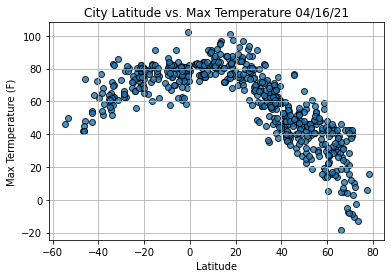

In [13]:
# Import time module
import time

# Build the scatter plot for latitude and max temperature.
plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Termperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

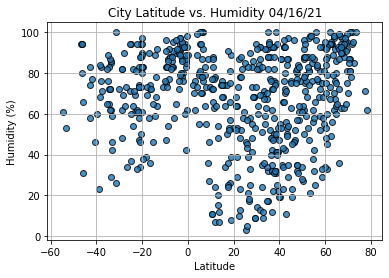

In [14]:
# Build the scatter plot for latitude and humidity.
plt.scatter(lats, humidity, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

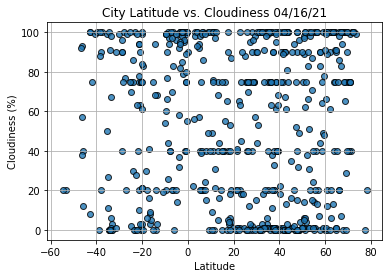

In [15]:
# Build the scatter plot for latitude and cloudiness.
plt.scatter(lats, cloudiness, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

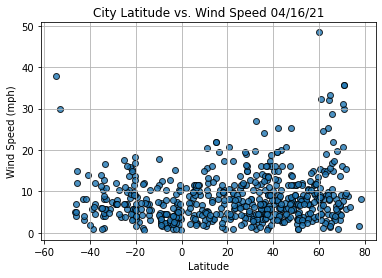

In [16]:
# Build the scatter plot for latitude and wind_speed.
plt.scatter(lats, wind_speed, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [17]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data. 
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values =  x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.title(title)
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [18]:
index13 = city_data_df.loc[13]
index13

City                        Tiksi
Country                        RU
Date          2021-04-16 19:50:19
Lat                       71.6872
Lng                       128.869
Max Temp                   -10.28
Humidity                      100
Cloudiness                    100
Wind Speed                   5.86
Name: 13, dtype: object

In [19]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3      False
4      False
       ...  
580     True
581     True
582     True
583     True
584     True
Name: Lat, Length: 585, dtype: bool

In [20]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Narsaq,GL,2021-04-16 19:50:16,60.9167,-46.0500,23.00,33,20,32.21
1,Leningradskiy,RU,2021-04-16 19:50:16,69.3833,178.4167,28.78,81,100,6.46
2,Miles City,US,2021-04-16 19:46:00,46.4083,-105.8406,48.20,46,20,11.50
6,Shimoda,JP,2021-04-16 19:50:17,34.6667,138.9500,51.01,92,100,11.70
7,Vostok,RU,2021-04-16 19:50:18,46.4856,135.8833,31.86,96,94,3.58


In [21]:
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Hobart,AU,2021-04-16 19:46:14,-42.8794,147.3294,54.00,58,100,8.05
4,Punta Arenas,CL,2021-04-16 19:50:17,-53.1500,-70.9167,50.00,53,20,29.93
5,Avarua,CK,2021-04-16 19:50:17,-21.2078,-159.7750,82.40,74,10,3.44
12,Rikitea,PF,2021-04-16 19:50:19,-23.1203,-134.9692,77.11,69,100,10.29
14,Cidreira,BR,2021-04-16 19:50:19,-30.1811,-50.2056,73.18,72,99,7.54


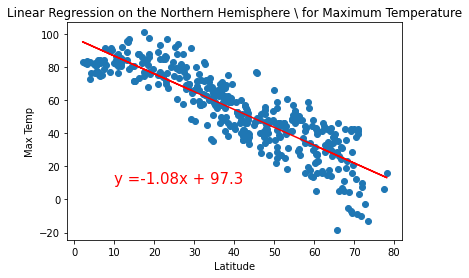

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values,y_values,'Linear Regression on the Northern Hemisphere \ for Maximum Temperature', 'Max Temp', (10,10))


In [23]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
# Get the equation of the line
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r-value is: {r_value:.3f}")

y = -1.08x + 97.3
The r-value is: -0.874


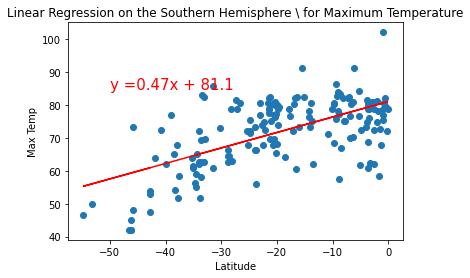

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \ for Maximum Temperature', 'Max Temp',(-50,85))

In [25]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
# Get the equation of the line
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r-value is: {r_value:.3f}")

y = 0.47x + 81.1
The r-value is: 0.609


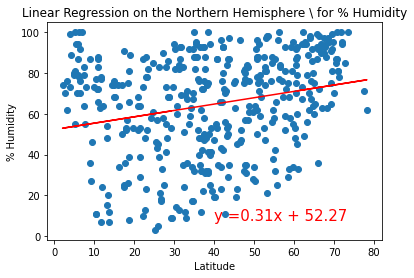

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function
plot_linear_regression(x_values,y_values,'Linear Regression on the Northern Hemisphere \ for % Humidity', '% Humidity', (40,8))


In [27]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
# Get the equation of the line
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r-value is: {r_value:.3f}")

y = 0.31x + 52.27
The r-value is: 0.239


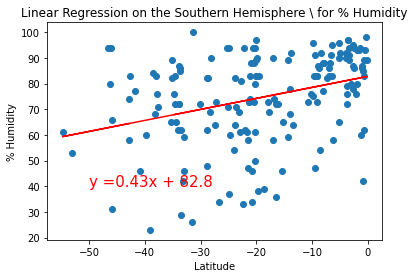

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \ for % Humidity', '% Humidity',(-50,40))

In [29]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
# Get the equation of the line
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r-value is: {r_value:.3f}")

y = 0.43x + 82.8
The r-value is: 0.329


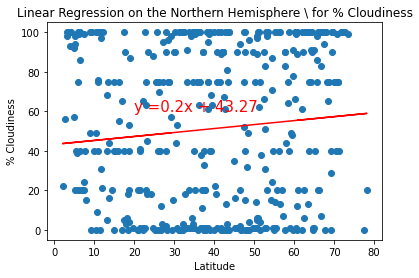

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values,y_values,'Linear Regression on the Northern Hemisphere \ for % Cloudiness', '% Cloudiness', (20,60))


In [31]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
# Get the equation of the line
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r-value is: {r_value:.3f}")

y = 0.2x + 43.27
The r-value is: 0.096


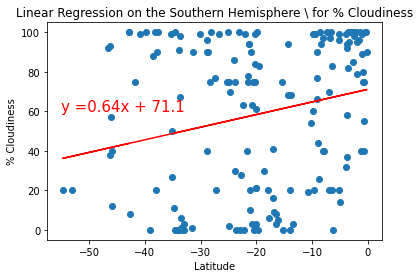

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \ for % Cloudiness', '% Cloudiness',(-55,60))

In [33]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
# Get the equation of the line
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r-value is: {r_value:.3f}")

y = 0.64x + 71.1
The r-value is: 0.228


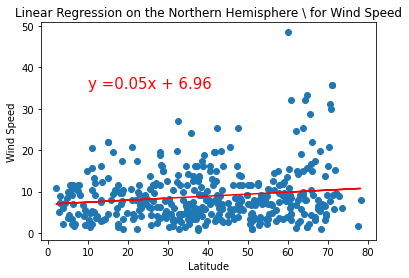

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function
plot_linear_regression(x_values,y_values,'Linear Regression on the Northern Hemisphere \ for Wind Speed', 'Wind Speed', (10,35))


In [35]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
# Get the equation of the line
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r-value is: {r_value:.3f}")

y = 0.05x + 6.96
The r-value is: 0.146


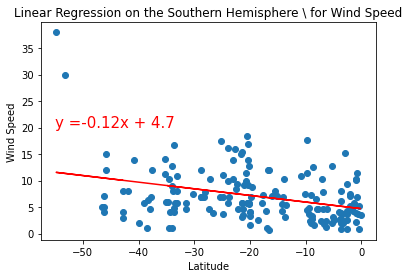

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \ for Wind Speed', 'Wind Speed',(-55,20))

In [37]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
# Get the equation of the line
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r-value is: {r_value:.3f}")

y = -0.12x + 4.7
The r-value is: -0.336
